https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# read csv from github directly
#url_dataset = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'
#df = pd.read_csv(url_dataset, nrows=50000)
#data = pd.read_csv(url_dataset)

# read csv from github directly
url_dataset = 'https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/Live%20Assignment%201/df1hotmerge2.csv?raw=true'
#df = pd.read_csv(url_dataset, nrows=50000)
data = pd.read_csv(url_dataset, nrows=50000)

In [3]:
print(data.shape)
print(list(data.columns))

(50000, 68)
['Unnamed: 0', 'pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'counter', 'liquor_category', 'store_parent', 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'liquor_category_WHISKY', 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'year_2019', 'monthyear_Apr-2019', 'monthyear_Aug-2019', 'monthyear_Dec

In [4]:
data = data.drop(columns = ['Unnamed: 0'])

In [5]:
count_not_whiskey = len(data[data['liquor_category_WHISKY']==0])
count_whiskey = len(data[data['liquor_category_WHISKY']==1])
pct_of_no_whiskey = count_not_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of not whiskey is", pct_of_no_whiskey*100)
pct_of_whiskey = count_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of whiskey", pct_of_whiskey*100)

percentage of not whiskey is 75.28399999999999
percentage of whiskey 24.715999999999998


In [6]:
cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [7]:
to_keep

['pack',
 'bottle_volume_ml',
 'state_bottle_cost',
 'state_bottle_retail',
 'bottles_sold',
 'sale_dollars',
 'volume_sold_liters',
 'volume_sold_gallons',
 'liquor_category_WHISKY',
 'store_parent_CVS',
 'store_parent_Caseys',
 'store_parent_Hy-Vee',
 'store_parent_Kum&Go',
 'store_parent_Other',
 'store_parent_QuikTrip',
 'store_parent_SamsClub',
 'store_parent_SmokingJoes',
 'store_parent_Target',
 'store_parent_Wal-Mart',
 'store_parent_Walgreens',
 'year_2019',
 'monthyear_Apr-2019',
 'monthyear_Aug-2019',
 'monthyear_Dec-2019',
 'monthyear_Feb-2019',
 'monthyear_Jan-2019',
 'monthyear_Jul-2019',
 'monthyear_Jun-2019',
 'monthyear_Mar-2019',
 'monthyear_May-2019',
 'monthyear_Nov-2019',
 'monthyear_Oct-2019',
 'monthyear_Sep-2019',
 'sale_dollars_trans',
 'cost_per_liter',
 'cost_per_liter_trans',
 'state_bottle_cost_trans',
 'bottles_sold_trans',
 'volume_sold_liters_trans',
 'grossmargin']

In [8]:
data_final=data[to_keep]
data_final.columns.values

array(['pack', 'bottle_volume_ml', 'state_bottle_cost',
       'state_bottle_retail', 'bottles_sold', 'sale_dollars',
       'volume_sold_liters', 'volume_sold_gallons',
       'liquor_category_WHISKY', 'store_parent_CVS',
       'store_parent_Caseys', 'store_parent_Hy-Vee',
       'store_parent_Kum&Go', 'store_parent_Other',
       'store_parent_QuikTrip', 'store_parent_SamsClub',
       'store_parent_SmokingJoes', 'store_parent_Target',
       'store_parent_Wal-Mart', 'store_parent_Walgreens', 'year_2019',
       'monthyear_Apr-2019', 'monthyear_Aug-2019', 'monthyear_Dec-2019',
       'monthyear_Feb-2019', 'monthyear_Jan-2019', 'monthyear_Jul-2019',
       'monthyear_Jun-2019', 'monthyear_Mar-2019', 'monthyear_May-2019',
       'monthyear_Nov-2019', 'monthyear_Oct-2019', 'monthyear_Sep-2019',
       'sale_dollars_trans', 'cost_per_liter', 'cost_per_liter_trans',
       'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'grossmargin'], dtype=object)

In [9]:
X = data_final.loc[:, data_final.columns != 'liquor_category_WHISKY']
y = data_final.loc[:, data_final.columns == 'liquor_category_WHISKY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [10]:
X

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,store_parent_CVS,store_parent_Caseys,...,monthyear_Nov-2019,monthyear_Oct-2019,monthyear_Sep-2019,sale_dollars_trans,cost_per_liter,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,grossmargin
0,20,375,3.85,5.78,20,115.60,7.50,1.98,0,0,...,1,0,0,4.750136,15.413333,2.735233,1.348073,2.995732,2.014903,0.333910
1,8,50,8.75,13.13,1,13.13,0.05,0.01,0,0,...,1,0,0,2.574900,262.600000,5.570632,2.169054,0.000000,-2.995732,0.333587
2,12,1000,16.50,24.75,6,148.50,6.00,1.58,0,0,...,0,0,0,5.000585,24.750000,3.208825,2.803360,1.791759,1.791759,0.333333
3,6,750,21.17,31.76,24,762.24,18.00,4.75,0,0,...,1,0,0,6.636261,42.346667,3.745890,3.052585,3.178054,2.890372,0.333438
4,6,1750,9.31,13.97,12,167.64,21.00,5.54,0,0,...,1,0,0,5.121819,7.982857,2.077296,2.231089,2.484907,3.044522,0.333572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,12,750,4.39,6.59,12,102.96,9.00,2.37,0,0,...,0,0,0,4.634341,11.440000,2.437116,1.479329,2.484907,2.197225,0.333839
49996,12,750,11.99,17.99,12,215.88,9.00,2.37,0,0,...,0,0,0,5.374723,23.986667,3.177498,2.484073,2.484907,2.197225,0.333519
49997,24,375,3.63,5.45,24,130.80,9.00,2.37,0,0,...,0,0,0,4.873669,14.533333,2.676445,1.289233,3.178054,2.197225,0.333945
49998,12,750,14.99,22.49,12,269.88,9.00,2.37,0,0,...,0,0,0,5.597977,29.986667,3.400753,2.707383,2.484907,2.197225,0.333482


In [11]:
y

,liquor_category_WHISKY
0,0
1,0
2,0
3,1
4,0
...,...
49995,0
49996,0
49997,0
49998,0


In [12]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [13]:
logisticRegr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
coef = logisticRegr.coef_[0]
classes = logisticRegr.classes_[0]
intercept = logisticRegr.intercept_[0]
print (coef)

[-0.02119956 -0.00264218  0.04779168  0.07043712 -0.0760548   0.00242362
  0.01502996  0.00352183  0.00796299 -0.02186845  0.09429135 -0.0202809
 -0.15366254 -0.01434461 -0.00173535 -0.0216341   0.01104773  0.00061343
  0.00572019 -0.11389028 -0.04846647  0.05412639 -0.0252553   0.00826736
  0.0025418  -0.04067566 -0.04775245  0.01516842 -0.05008073  0.00770728
  0.00540219  0.00512689 -0.02805986 -0.00336043 -0.18041852  0.13132939
 -0.11055134  0.15235866 -0.03810307]


In [15]:
intercept

-0.11389765549649311

In [16]:
classes

0

In [17]:
len(X_train.columns)

39

In [18]:
# Returns a NumPy Array
predictions = logisticRegr.predict(X_test)

In [19]:
params =logisticRegr.get_params(deep=True)
params

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [20]:
decfunct = pd.DataFrame(logisticRegr.decision_function(X_test))
decfunct

,0
0,-3.134774
1,-1.005600
2,-3.574093
3,-3.717148
4,-2.907099
...,...
14995,-0.134655
14996,-0.642347
14997,-1.947922
14998,-1.525744


In [21]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.8302666666666667


In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = logisticRegr.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.876


ROC Curves and AUC in Python
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

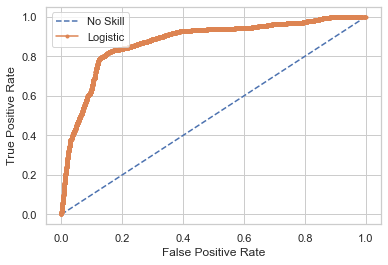

In [23]:
from matplotlib import pyplot
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Precision-Recall Curves in Python

Logistic: f1=0.586 auc=0.702


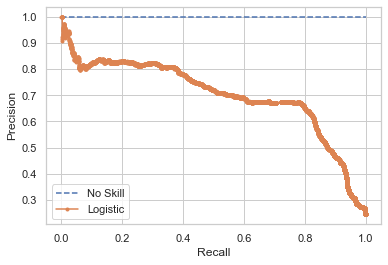

In [24]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
lr_probs = logisticRegr .predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = logisticRegr .predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

When to Use ROC vs. Precision-Recall Curves?
Generally, the use of ROC curves and precision-recall curves are as follows:

ROC curves should be used when there are roughly equal numbers of observations for each class.
Precision-Recall curves should be used when there is a moderate to large class imbalance.

In [25]:
predictionsdf = pd.DataFrame(predictions)

In [26]:
predictionsdf[predictionsdf[0] == 1]

,0
12,1
17,1
19,1
44,1
45,1
...,...
14944,1
14953,1
14956,1
14962,1


In [27]:
X_test

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,store_parent_CVS,store_parent_Caseys,...,monthyear_Nov-2019,monthyear_Oct-2019,monthyear_Sep-2019,sale_dollars_trans,cost_per_liter,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,grossmargin
11841,12,1000,4.34,6.51,12,78.12,12.00,3.17,0,0,...,0,0,0,4.358246,6.510000,1.873339,1.467874,2.484907,2.484907,0.333333
19602,6,1750,25.00,37.50,12,450.00,21.00,5.54,0,0,...,0,0,0,6.109248,21.428571,3.064725,3.218876,2.484907,3.044522,0.333333
45519,12,1000,2.33,3.50,12,42.00,12.00,3.17,0,0,...,0,0,0,3.737670,3.500000,1.252763,0.845868,2.484907,2.484907,0.334286
25747,6,1750,9.44,14.16,6,84.96,10.50,2.77,1,0,...,0,0,0,4.442181,8.091429,2.090805,2.244956,1.791759,2.351375,0.333333
42642,12,1000,4.42,6.63,2,13.26,2.00,0.52,0,0,...,0,1,0,2.584752,6.630000,1.891605,1.486140,0.693147,0.693147,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38344,6,750,17.50,26.25,6,157.50,4.50,1.18,0,0,...,0,0,0,5.059425,35.000000,3.555348,2.862201,1.791759,1.504077,0.333333
49984,12,750,16.09,24.14,12,289.68,9.00,2.37,0,0,...,0,0,0,5.668777,32.186667,3.471552,2.778198,2.484907,2.197225,0.333471
32624,12,200,4.67,7.01,12,84.12,2.40,0.63,0,0,...,0,1,0,4.432244,35.050000,3.556776,1.541159,2.484907,0.875469,0.333809
46437,12,500,6.60,9.90,1,9.90,0.50,0.13,0,0,...,0,0,0,2.292535,19.800000,2.985682,1.887070,0.000000,-0.693147,0.333333


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [29]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[10654   691]
 [ 1855  1800]]


In [30]:
cm.shape

(2, 2)

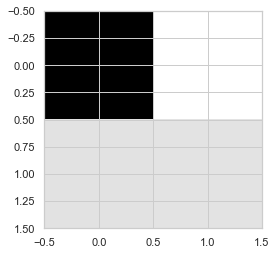

In [31]:
plt.imshow(cm, cmap='binary')

In [32]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(cm, range(2), range(2))

In [33]:
df_cm

,0,1
0,10654,691
1,1855,1800


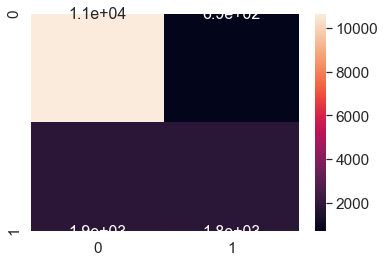

In [34]:
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [35]:
len(to_keep)

40

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = data.loc[:, to_keep].values
# Separating out the target
y = data.loc[:,['liquor_category_WHISKY']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=28)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
#             , columns = ['principal component 1', 'principal component 2', '3',
#                         '4', '5'])


pca.explained_variance_ratio_
finalDf = pd.concat([principalDf, data[['liquor_category_WHISKY']]], axis = 1)

In [37]:
pca

PCA(copy=True, iterated_power='auto', n_components=28, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
pca.explained_variance_ratio_

array([0.12617198, 0.10768157, 0.0626277 , 0.04499906, 0.03702057,
       0.02978443, 0.02858939, 0.02851136, 0.0283988 , 0.02820341,
       0.02816414, 0.02800572, 0.0279225 , 0.02785576, 0.02768835,
       0.027585  , 0.02753692, 0.02609149, 0.02597605, 0.02576267,
       0.02568133, 0.02562267, 0.02548751, 0.02505393, 0.02445374,
       0.0222921 , 0.01951633, 0.01517682])

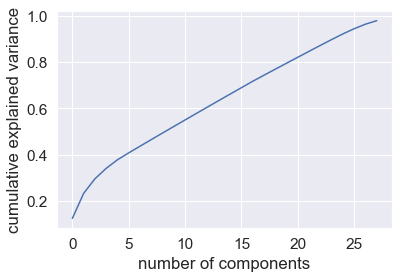

In [39]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [40]:
finalDf

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,liquor_category_WHISKY
0,1.215345,-1.774090,0.664154,0.639260,-1.977676,0.088233,0.603431,1.877983,1.400098,-1.274531,...,-0.044357,0.094049,0.298744,0.242135,-0.013666,-0.002961,0.365296,-0.021306,0.273955,0
1,-3.851481,0.046082,4.573797,0.411811,-0.370336,-1.260439,0.787771,2.190572,1.048748,-1.116267,...,-0.153485,-0.017183,0.424757,0.003260,0.271725,0.767458,-1.256441,1.967400,-0.919630,0
2,0.154727,0.628510,-0.935101,-1.300381,0.328929,-1.334594,-0.977879,-1.028862,0.571913,-1.042015,...,-0.244247,-0.554661,-0.345262,0.624215,-0.313030,-0.033427,0.237046,0.685492,0.342598,0
3,0.947538,2.934370,-0.634071,-1.819307,-1.662706,0.391141,0.320169,1.803473,1.388176,-1.298229,...,-0.111610,0.072297,0.342130,0.054513,-0.190644,-0.210291,0.699741,-0.533404,-0.903199,1
4,1.705409,0.101187,-2.200537,-1.103498,0.432551,-0.295502,0.673729,2.163738,1.117529,-1.182429,...,-0.142626,-0.013219,0.257577,0.023876,0.073924,0.635903,1.008991,0.507297,0.017711,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.219301,-1.373770,-0.678364,-1.504900,0.303114,1.151442,-0.340973,-0.291306,0.568400,-0.888019,...,0.052156,0.271409,0.096709,0.170111,0.015547,-0.208729,-0.650050,0.700804,-0.247381,0
49996,0.770991,0.208682,-0.706917,-1.484977,-0.098523,0.804630,-0.185537,-0.193853,0.234045,-0.218526,...,0.113201,0.172872,-0.088020,0.012434,-0.068472,-0.536686,-0.511515,0.927135,0.088865,0
49997,1.529386,-2.032585,0.532092,0.757493,-1.567999,1.056562,0.053593,-0.637707,-0.377827,1.561039,...,0.463501,0.139478,-0.209759,0.173615,-0.053926,-1.239894,-0.433957,0.173195,0.281181,0
49998,0.629211,0.703421,-0.675294,-1.492130,-0.235488,0.825571,-0.218030,-0.237774,0.233198,-0.224191,...,0.114448,0.192432,-0.078494,-0.006605,-0.076281,-0.580586,-0.483050,1.037703,0.218935,0


In [42]:
X = finalDf.loc[:, finalDf.columns != 'liquor_category_WHISKY']
y = finalDf.loc[:, finalDf.columns == 'liquor_category_WHISKY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [43]:
#possibility to scale it?
#from sklearn import preprocessing
#X_train2 = preprocessing.scale(X_train)
#X_test2 = preprocessing.scale(X_test)

# all parameters not specified are set to their defaults
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
from sklearn.svm import SVC
#svclassifier = SVC(kernel='poly', degree=8)
#svclassifier = SVC(kernel='rbf')
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
# Returns a NumPy Array
predictions = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[11344     1]
 [    0  3655]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11345
           1       1.00      1.00      1.00      3655

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

